In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


In [2]:

test_df=pd.read_csv("/kaggle/input/ab-testing-dataset/test_group.csv",sep=";")
control_df=pd.read_csv("/kaggle/input/ab-testing-dataset/control_group.csv",sep=";")

In [3]:
test_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [4]:
def pre_eda(data):
    print("="*50)
    print("📌 DATA OVERVIEW")
    print("="*50)
    print(data.head(), "\n")
    
    print("="*50)
    print("🔎 NULL VALUE CHECK")
    print("="*50)
    total_nulls = data.isnull().sum().sum()
    if total_nulls == 0:
        print("✅ No null values.\n")
    else:
        print(f"⚠️ Dataset contains {total_nulls} null values.")
        if total_nulls <=10:
            null_indices = data[data.isnull().any(axis=1)].index.tolist()
            print(f"Rows with null values: {null_indices}\n")
        else:
            print("Too many null values.\n")
    
    print("="*50)
    print("📊 STATISTICAL SUMMARY")
    print("="*50)
    print(data.describe(), "\n")
    
    print("="*50)
    print("📂 DATA TYPES & INFO")
    print("="*50)
    data.info()
    print("\n" + "="*50)


In [5]:
pre_eda(test_df)

📌 DATA OVERVIEW
   Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4    

In [6]:
pre_eda(control_df)

📌 DATA OVERVIEW
      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2      

Since the number of missing values in the control group dataset is less, and cannot be imputed as they are specific to an individual, I have dropped the null rows.

In [7]:
control_df=control_df.dropna(axis=0)
print(control_df.isnull().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


Converting to datetime dtype

In [8]:
test_df['Date']=pd.to_datetime(test_df['Date'],format='mixed')
control_df['Date']=pd.to_datetime(control_df['Date'],format='mixed')

# Measuring KPIs

In [9]:
def measure_kpi(df):
    df['ctr']=(
    round((df['# of Website Clicks'].astype(float) / 
    df['# of Impressions'].astype(float)),2)
    )
    df['search_rate']=(
    round((df['# of Searches'].astype(float) / 
    df['# of Website Clicks'].astype(float)),2)
    )
    df['addtocart_rate']=(
    round((df['# of Add to Cart'].astype(float) / 
    df['# of Website Clicks'].astype(float)),2)
    )
    df['Purchase_rate']=(
    round((df['# of Purchase'].astype(float) / 
    df['# of Impressions'].astype(float)),2)
    )
    df['Checkout_rate']=(
    round((df['# of Purchase'].astype(float) / 
    df['# of Add to Cart'].astype(float)),2)
    )
    df['cpc']=(
    round((df['Spend [USD]'].astype(float) / 
    df['# of Website Clicks'].astype(float)),2)
    )
    df['cpa']=(
    round((df['Spend [USD]'].astype(float) / 
    df['# of Purchase'].astype(float)),2)
    )
    return df
    

In [10]:
#KPIs for control group:
measure_kpi(control_df)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,ctr,search_rate,addtocart_rate,Purchase_rate,Checkout_rate,cpc,cpa
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.08,0.33,0.26,0.01,0.34,0.32,3.69
1,Control Campaign,2019-02-08,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.07,0.25,0.15,0.00,0.42,0.22,3.44
2,Control Campaign,2019-03-08,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.05,0.27,0.17,0.00,0.33,0.36,6.30
3,Control Campaign,2019-04-08,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.04,0.34,0.39,0.00,0.29,0.63,5.71
5,Control Campaign,2019-06-08,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,0.04,0.42,0.19,0.01,0.97,0.77,4.04
6,Control Campaign,2019-07-08,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,0.02,0.53,0.44,0.00,0.43,0.96,5.10
7,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,0.08,0.42,0.13,0.01,0.50,0.26,4.11
8,Control Campaign,2019-09-08,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,0.05,0.40,0.10,0.00,0.78,0.45,5.61
9,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0.02,1.09,0.72,0.01,0.45,0.94,2.93
10,Control Campaign,2019-11-08,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0,0.07,0.36,0.23,0.00,0.25,0.31,5.24


In [11]:
#KPIs for test group
measure_kpi(test_df)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,ctr,search_rate,addtocart_rate,Purchase_rate,Checkout_rate,cpc,cpa
0,Test Campaign,2019-01-08,3008,39550,35820,3038,1946,1069,894,255,0.08,0.64,0.29,0.01,0.29,0.99,11.80
1,Test Campaign,2019-02-08,2542,100719,91236,4657,2359,1548,879,677,0.05,0.51,0.19,0.01,0.77,0.55,3.75
2,Test Campaign,2019-03-08,2365,70263,45198,7885,2572,2367,1268,578,0.11,0.33,0.16,0.01,0.46,0.30,4.09
3,Test Campaign,2019-04-08,2710,78451,25937,4216,2216,1437,566,340,0.05,0.53,0.13,0.00,0.60,0.64,7.97
4,Test Campaign,2019-05-08,2297,114295,95138,5863,2106,858,956,768,0.05,0.36,0.16,0.01,0.80,0.39,2.99
5,Test Campaign,2019-06-08,2458,42684,31489,7488,1854,1073,882,488,0.18,0.25,0.12,0.01,0.55,0.33,5.04
6,Test Campaign,2019-07-08,2838,53986,42148,4221,2733,2182,1301,890,0.08,0.65,0.31,0.02,0.68,0.67,3.19
7,Test Campaign,2019-08-08,2916,33669,20149,7184,2867,2194,1240,431,0.21,0.40,0.17,0.01,0.35,0.41,6.77
8,Test Campaign,2019-09-08,2652,45511,31598,8259,2899,2761,1200,845,0.18,0.35,0.15,0.02,0.70,0.32,3.14
9,Test Campaign,2019-10-08,2790,95054,79632,8125,2312,1804,424,275,0.09,0.28,0.05,0.00,0.65,0.34,10.15


Merging control and test dataset

In [12]:
merge_df=pd.merge(control_df,test_df,on='Date',how='inner',suffixes=('_ctrl','_test'))
merge_df.head(10)
#merge_df.columns

,Campaign Name_ctrl,Date,Spend [USD]_ctrl,# of Impressions_ctrl,Reach_ctrl,# of Website Clicks_ctrl,# of Searches_ctrl,# of View Content_ctrl,# of Add to Cart_ctrl,# of Purchase_ctrl,...,# of View Content_test,# of Add to Cart_test,# of Purchase_test,ctr_test,search_rate_test,addtocart_rate_test,Purchase_rate_test,Checkout_rate_test,cpc_test,cpa_test
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,...,1069,894,255,0.08,0.64,0.29,0.01,0.29,0.99,11.80
1,Control Campaign,2019-02-08,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,...,1548,879,677,0.05,0.51,0.19,0.01,0.77,0.55,3.75
2,Control Campaign,2019-03-08,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,...,2367,1268,578,0.11,0.33,0.16,0.01,0.46,0.30,4.09
3,Control Campaign,2019-04-08,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,...,1437,566,340,0.05,0.53,0.13,0.00,0.60,0.64,7.97
4,Control Campaign,2019-06-08,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,...,1073,882,488,0.18,0.25,0.12,0.01,0.55,0.33,5.04
5,Control Campaign,2019-07-08,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,...,2182,1301,890,0.08,0.65,0.31,0.02,0.68,0.67,3.19
6,Control Campaign,2019-08-08,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,...,2194,1240,431,0.21,0.40,0.17,0.01,0.35,0.41,6.77
7,Control Campaign,2019-09-08,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,...,2761,1200,845,0.18,0.35,0.15,0.02,0.70,0.32,3.14
8,Control Campaign,2019-10-08,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,...,1804,424,275,0.09,0.28,0.05,0.00,0.65,0.34,10.15
9,Control Campaign,2019-11-08,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0,...,2617,1075,668,0.04,0.77,0.29,0.01,0.62,0.65,3.62


In [13]:
new_df=pd.concat([control_df,test_df],ignore_index=True)
new_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase', 'ctr', 'search_rate',
       'addtocart_rate', 'Purchase_rate', 'Checkout_rate', 'cpc', 'cpa'],
      dtype='object')

Visualizing Histograms for each KPI to see the distributions

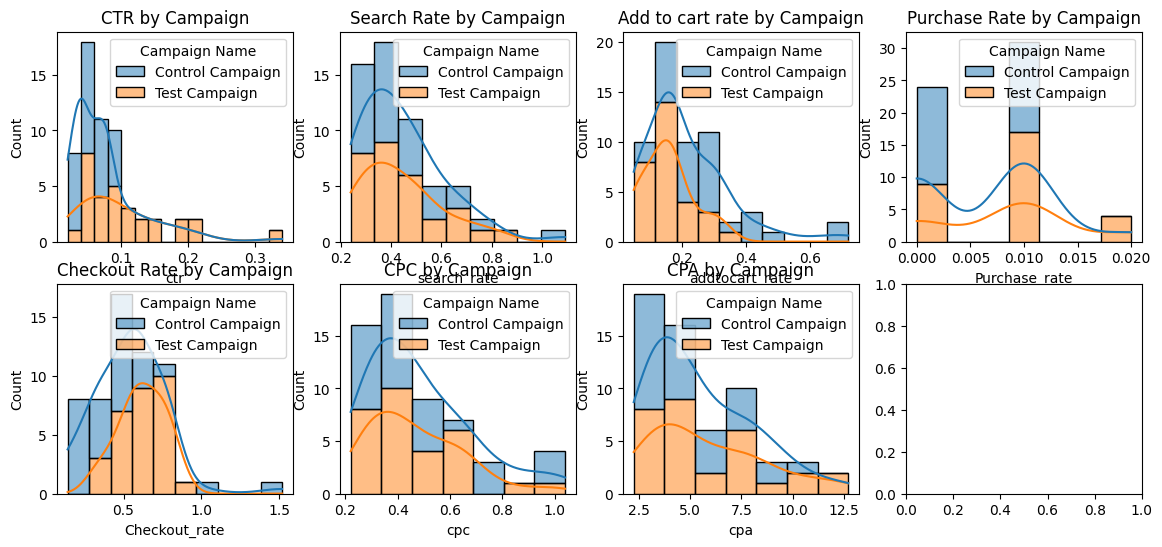

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,4, figsize=(14, 6))
sns.histplot(data=new_df, x='ctr', hue='Campaign Name', multiple='stack', ax=axs[0,0], kde=True)
axs[0,0].set_title('CTR by Campaign')
sns.histplot(data=new_df, x='search_rate', hue='Campaign Name', multiple='stack', ax=axs[0,1],kde=True)
axs[0,1].set_title('Search Rate by Campaign')
sns.histplot(data=new_df, x='addtocart_rate', hue='Campaign Name', multiple='stack', ax=axs[0,2],kde=True)
axs[0,2].set_title('Add to cart rate by Campaign')
sns.histplot(data=new_df, x='Purchase_rate', hue='Campaign Name', multiple='stack', ax=axs[0,3],kde=True)
axs[0,3].set_title('Purchase Rate by Campaign')
sns.histplot(data=new_df, x='Checkout_rate', hue='Campaign Name', multiple='stack', ax=axs[1,0],kde=True)
axs[1,0].set_title('Checkout Rate by Campaign')
sns.histplot(data=new_df, x='cpc', hue='Campaign Name', multiple='stack', ax=axs[1,1],kde=True)
axs[1,1].set_title('CPC by Campaign')
sns.histplot(data=new_df, x='cpa', hue='Campaign Name', multiple='stack', ax=axs[1,2],kde=True)
axs[1,2].set_title('CPA by Campaign')
plt.show()

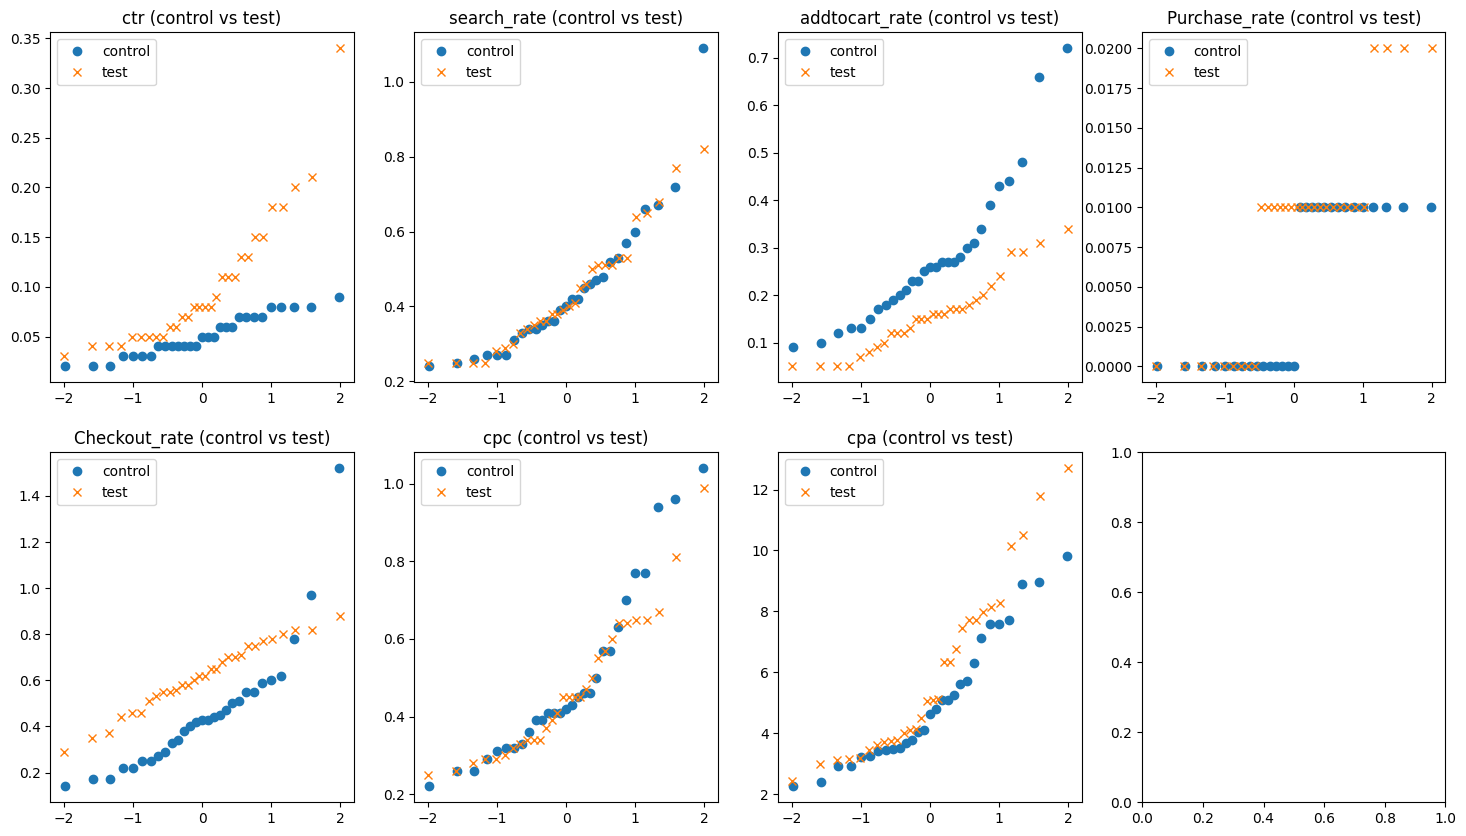

In [15]:
from scipy import stats
fig, axs = plt.subplots(2,4, figsize=(18, 10))
KPI_cols=['ctr', 'search_rate',
       'addtocart_rate', 'Purchase_rate', 'Checkout_rate', 'cpc', 'cpa']

for idx, col in enumerate(KPI_cols):
    i = idx // 4  # row
    j = idx % 4   # col
    # Probplot for control
    osm, osr = stats.probplot(control_df[col].dropna(), dist='norm')[0]
    axs[i,j].plot(osm, osr, 'o', label='control')

    osm, osr = stats.probplot(test_df[col].dropna(), dist='norm')[0]
    axs[i,j].plot(osm, osr, 'x', label='test')
    axs[i,j].legend()
    axs[i,j].set_title(f'{col} (control vs test)')
plt.show()

# Testing Of Hypothesis
For statistical analysis, I have used the following tests:

* Shapiro test for normality
* Levene test for equal variances
* Mann Whitney U test for comparison of distributions
* Welch's T-Test for comparing means

I have also used Cliff's delta for quantifying the differences.

**Shapiro Test: To check for normality of the distributions.**

Since, the p-value for test group is less than alpha, we reject the null hypothesis, i.e the test group CTR is non-normal.
However, for the control group, the p-value>alpha, hence we fail to reject the null hypothesis, i.e the control group CTR is normal, as can be seen in the QQ plot.

In [16]:
from scipy.stats import shapiro,mannwhitneyu,levene,ttest_ind

In [17]:
for idx,col in enumerate(KPI_cols):
    ctrl_normal=stats.shapiro(test_df[col])
    test_normal=stats.shapiro(control_df[col])
    print(f'shapiro test for {col} is : ',ctrl_normal,'\n',test_normal)
    if ctrl_normal.pvalue<0.05:
        print(f'Reject the null Hypothesis: control {col} is not normal')
    else:
        print(f'Fail to Reject the null Hypothesis: control {col} is normal')
    if test_normal.pvalue<0.05:
        print(f'Reject the null Hypothesis: test {col} is not normal','\n')
    else:
        print(f'Fail to Reject the null Hypothesis: test {col} is normal','\n')
        
    

shapiro test for ctr is :  ShapiroResult(statistic=0.8347049230084496, pvalue=0.0003014901683502415) 
 ShapiroResult(statistic=0.9332240742501463, pvalue=0.06670394515435761)
Reject the null Hypothesis: control ctr is not normal
Fail to Reject the null Hypothesis: test ctr is normal 

shapiro test for search_rate is :  ShapiroResult(statistic=0.9197332343738605, pvalue=0.026396994850791305) 
 ShapiroResult(statistic=0.8520944737772528, pvalue=0.0008400040810560976)
Reject the null Hypothesis: control search_rate is not normal
Reject the null Hypothesis: test search_rate is not normal 

shapiro test for addtocart_rate is :  ShapiroResult(statistic=0.9377237543510459, pvalue=0.07899458267649138) 
 ShapiroResult(statistic=0.8742317792852292, pvalue=0.0024994284800919256)
Fail to Reject the null Hypothesis: control addtocart_rate is normal
Reject the null Hypothesis: test addtocart_rate is not normal 

shapiro test for Purchase_rate is :  ShapiroResult(statistic=0.78545979376607, pvalue=3.

**All the KPIs are non-normal for both control AND test group**

**Levene Test:** To check the equality of variances. If the variance is not equal, we apply Welch's t-test.

For KPIs like CTR and Add to cart rate, since p-value<alpha, we reject the null hypothesis. Hence, the variances are different. Therefore, we'll use Welch T-Test.

For the other KPIs, p-value>alpha, hence we accept the null hypothesis, i.e the variances are equal. We can use Student's T-Test to compare their means as the sample size~30.

However, for the purchase rate, since the shapiro test strongly rejects the normality, we will only focus on the mann whitney U test for comparison.

In [18]:
for idx,col in enumerate(KPI_cols):
    stat,p=levene(control_df[col], test_df[col])
    print(f"Levene test p-value for {col}:", round(p,4))
    if p<0.05:
        print(f'Reject the null Hypothesis: The groups do not have equal variances','\n')
    else:
        print(f'Fail to Reject the null Hypothesis: The groups have equal variances','\n')

Levene test p-value for ctr: 0.004
Reject the null Hypothesis: The groups do not have equal variances 

Levene test p-value for search_rate: 0.8004
Fail to Reject the null Hypothesis: The groups have equal variances 

Levene test p-value for addtocart_rate: 0.0433
Reject the null Hypothesis: The groups do not have equal variances 

Levene test p-value for Purchase_rate: 0.7091
Fail to Reject the null Hypothesis: The groups have equal variances 

Levene test p-value for Checkout_rate: 0.1882
Fail to Reject the null Hypothesis: The groups have equal variances 

Levene test p-value for cpc: 0.5946
Fail to Reject the null Hypothesis: The groups have equal variances 

Levene test p-value for cpa: 0.1976
Fail to Reject the null Hypothesis: The groups have equal variances 



**Welch T-Test:** It is a variation of student t-test that is used when the variances are not equal.

Since, p-value<alpha, we reject the null hypothesis, i.e there is no significant difference between the mean CTR of the two groups.

**Student's T-Test**
Assumptions: Equal variances, sample size~30

In [19]:
equal_var_cols=['Checkout_rate', 'cpc', 'cpa', 'search_rate']
unequal_var_cols=['ctr','addtocart_rate']

#Welch's T-Test
for idx,col in enumerate(unequal_var_cols):
    stat ,p=ttest_ind(control_df[col], test_df[col],equal_var=False)
    print(f"Welch's T Test p-value for {col}:", round(p,4))
    if p<0.05:
        print(f'Reject the null Hypothesis: The mean {col} are not significantly equal for both control and test group','\n')
    else:
        print(f'Fail to Reject the null Hypothesis: The mean {col} are significantly equal for both control and test group','\n')
        
#Student's T-Test
for idx,col in enumerate(equal_var_cols):
    stat ,p=ttest_ind(control_df[col], test_df[col])
    print(f"Student's T Test p-value for {col}:", round(p,4))
    if p<0.05:
        print(f'Reject the null Hypothesis: The mean {col} are not significantly equal for both control and test group','\n')
    else:
        print(f'Fail to Reject the null Hypothesis: The mean {col} are significantly equal for both control and test group','\n')

Welch's T Test p-value for ctr: 0.0004
Reject the null Hypothesis: The mean ctr are not significantly equal for both control and test group 

Welch's T Test p-value for addtocart_rate: 0.0005
Reject the null Hypothesis: The mean addtocart_rate are not significantly equal for both control and test group 

Student's T Test p-value for Checkout_rate: 0.0074
Reject the null Hypothesis: The mean Checkout_rate are not significantly equal for both control and test group 

Student's T Test p-value for cpc: 0.613
Fail to Reject the null Hypothesis: The mean cpc are significantly equal for both control and test group 

Student's T Test p-value for cpa: 0.1964
Fail to Reject the null Hypothesis: The mean cpa are significantly equal for both control and test group 

Student's T Test p-value for search_rate: 0.9331
Fail to Reject the null Hypothesis: The mean search_rate are significantly equal for both control and test group 



**Mann Whitney U Test:** non-parametric test for non-normal distributions to compare the values of each group. Since p-value<alpha(0.05), we reject the null hypothesis: the distributions are significantly different from each other, as can be seen in the histplot.

* H0: There is no significant difference between the two distributions
* H1: There is a significant difference between the two distributions

In [20]:
for idx,col in enumerate(KPI_cols):
    stat,p=mannwhitneyu(control_df[col], test_df[col])
    print(f"Mann–Whitney U p-value for {col}:", round(p,4))
    if p<0.05:
        print(f'Reject the null Hypothesis: The distributions are not similar','\n')
    else:
        print(f'Fail to Reject the null Hypothesis: The distributions are similar','\n')

Mann–Whitney U p-value for ctr: 0.0003
Reject the null Hypothesis: The distributions are not similar 

Mann–Whitney U p-value for search_rate: 0.9214
Fail to Reject the null Hypothesis: The distributions are similar 

Mann–Whitney U p-value for addtocart_rate: 0.0004
Reject the null Hypothesis: The distributions are not similar 

Mann–Whitney U p-value for Purchase_rate: 0.0371
Reject the null Hypothesis: The distributions are not similar 

Mann–Whitney U p-value for Checkout_rate: 0.0002
Reject the null Hypothesis: The distributions are not similar 

Mann–Whitney U p-value for cpc: 0.8555
Fail to Reject the null Hypothesis: The distributions are similar 

Mann–Whitney U p-value for cpa: 0.275
Fail to Reject the null Hypothesis: The distributions are similar 



**Cliff's Delta:** It quantifies the difference between the two groups. A delta value lies between -1 and 1, with sign signifying the direction of difference, and the extreme ends signify large difference.

Since δ = 0.57, this indicates a large effect size: CTR in the test group is consistently higher than in the control group. In fact, there’s about a 78% chance that a randomly chosen test CTR will exceed a control CTR.

In [21]:
def cliffs_delta(x, y):
    n_x, n_y = len(x), len(y)
    greater = sum(xi > yj for xi in x for yj in y)
    less = sum(xi < yj for xi in x for yj in y)
    delta = (greater - less) / (n_x * n_y)
    return delta

# Example: control vs test CTR
for idx,col in enumerate(KPI_cols):
    delta = cliffs_delta(test_df[col], control_df[col])
    print(f"Cliff's Delta for {col}:", round(delta,2))
    if delta>=0.5:
        print(f'There is a {round(((delta+1)*100/2),2)}% chance of a randomly chosen test {col} performing better than control group','\n')
    elif delta<0:
        print(f'The control group performs better than the test group for {col}','\n')
    else:
        print(f'For {col}, the effect size is small, but positive delta indicates that test group performs better {round(((delta+1)*100/2),2)}% times ','\n')

Cliff's Delta for ctr: 0.55
There is a 77.64% chance of a randomly chosen test ctr performing better than control group 

Cliff's Delta for search_rate: 0.02
For search_rate, the effect size is small, but positive delta indicates that test group performs better 50.8% times  

Cliff's Delta for addtocart_rate: -0.54
The control group performs better than the test group for addtocart_rate 

Cliff's Delta for Purchase_rate: 0.28
For Purchase_rate, the effect size is small, but positive delta indicates that test group performs better 64.08% times  

Cliff's Delta for Checkout_rate: 0.57
There is a 78.33% chance of a randomly chosen test Checkout_rate performing better than control group 

Cliff's Delta for cpc: -0.03
The control group performs better than the test group for cpc 

Cliff's Delta for cpa: 0.17
For cpa, the effect size is small, but positive delta indicates that test group performs better 58.33% times  



# Plotting the difference in the two groups
ECDF(Empirical Cumulative Distribution Function): Tells us the CDF of the two groups' CDF. 

Test outperforms control group results consistently with a big vertical difference(large effect size, cliff's delta) for CTR

But for KPIs like add to cart rate and CPC, the control group performs better than the test group.
* What it means: The campaign negatively affects the add to cart rate and reduces the cost per click(it costs less per click now)

For KPIs like search rate, purchase rate, CPA: Since the effect size is small, almost half of the month, the control group performs better than test group.
* What it means: The campaign doesn't perform sgnificantly well in funnel stages searching and purchasing items and the CPA isn't actually that affected.

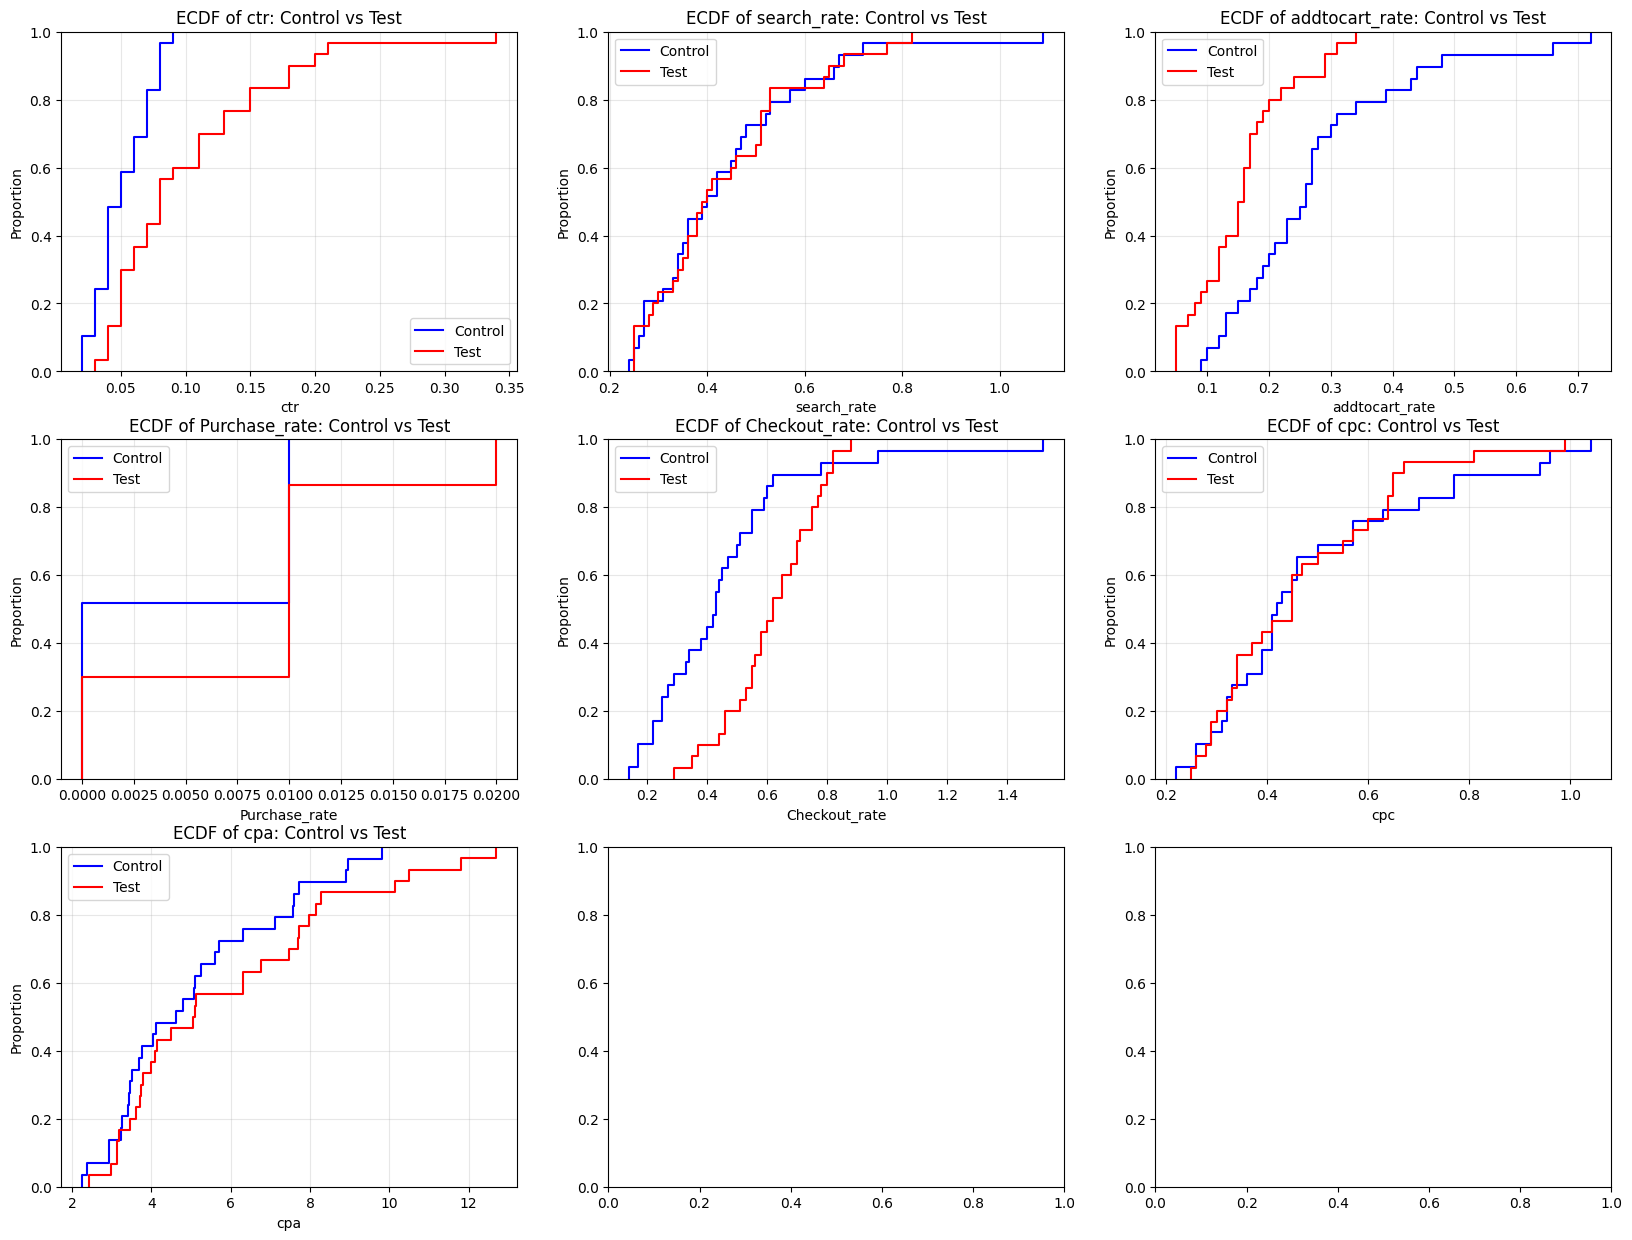

In [22]:
fig, axs=plt.subplots(3,3,figsize=(20,15))

for idx,col in enumerate(KPI_cols):
    i = idx // 3  # row
    j = idx % 3
    sns.ecdfplot(control_df[col], label="Control", color="blue",ax=axs[i,j])
    sns.ecdfplot(test_df[col], label="Test", color="red",ax=axs[i,j])
    axs[i,j].set_title(f"ECDF of {col}: Control vs Test")
    axs[i,j].legend()
    axs[i,j].grid(True, alpha=0.3)

In [23]:
print(control_df.shape,test_df.shape)

(29, 17) (30, 17)


In [24]:
test_df = test_df[test_df['Date'] != '2019-05-08']

In [25]:
for idx, col in enumerate(KPI_cols):
    print(f'% change in {col}:',round((test_df[col].mean()-control_df[col].mean())/control_df[col].mean(),4)*100,'\n')


% change in ctr: 104.05 

% change in search_rate: -0.22999999999999998 

% change in addtocart_rate: -43.3 

% change in Purchase_rate: 71.43 

% change in Checkout_rate: 33.71 

% change in cpc: -4.81 

% change in cpa: 18.75 



# Conclusion and Suggestions
The following insights can be understood from the testing:

* CTR increased by 104.5% and purchase rate increased by 71.43%
* However, the add to cart rate has decreased by 43.3% and the cost per acquisition has increased by 18.75%, which is a negative factor to consider.
* The search rate has decreased by 0.23%, while the checkout rate has increased by 33.71%.
* 
### Primary Metrics (Success Criteria)

* **CTR ↑ 104.5%** → Ads are effective at attracting clicks.
* **Purchase rate ↑ 71.4%** → Campaign drives more completed purchases.

### Guardrail Metrics (Health/Cost Checks)

* **Add-to-Cart rate ↓ 43.3%** → Funnel health concern (users less engaged at cart stage).
* **CPA ↑ 18.8%** → Cost efficiency worsened.
* **Search rate ↓ 0.2%** → Negligible drop (no major concern).
* **Checkout rate ↑ 33.7%** → Healthy improvement in conversion once checkout is initiated.
* 
### Conclusion

The experiment shows strong gains in **engagement (CTR)** and **purchases**, but **guardrail metrics** (CPA, add-to-cart) indicate risks to long-term cost efficiency and funnel health.

### Recommendations

1. **Guardrail Monitoring** → Keep CPA and add-to-cart as hard guardrails; don’t scale until cost efficiency is restored.
2. **Cart Recovery Focus** → Investigate drop at add-to-cart (UI friction, pricing, intent mismatch).
3. **Optimize Spend** → Adjust targeting/creative to reduce CPA while maintaining CTR.
4. **Validate Funnel Dynamics** → If users bypass cart (e.g., fast checkout), refine measurement so add-to-cart doesn’t misleadingly look worse.
5. **Run Iterative Tests** → Before full rollout, re-test with optimizations to guardrail metrics.

*The test campaign shows promising top-line wins but fails on cost efficiency guardrails*.